## Analysis on occluded datasets

In [1]:
import unicom
import torch

from torch.utils.data import DataLoader
from torchvision.datasets import DTD
from tqdm import tqdm
from torch.nn.functional import normalize
import matplotlib.pyplot as plt

from dataset import Inshop_Dataset

/home/haeji/miniconda3/envs/unicom/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_ori, preprocess_ori = unicom.load(name='ViT-B/16', path=None)
model_ori = model_ori.cuda()
model_ori.eval()

Loaded model ViT-B/16 from unicom!


VisionTransformer(
  (patch_embed): PatchEmbedding(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (drop_path): Identity()
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): ReLU6()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=False)
        (proj): Linear(in_features=768, out_features=768

In [3]:
model, preprocess = unicom.load(name="ViT-B/16", path='/home/haeji/unicom/24.pt')
model = model.cuda()
model.eval()

Loaded model from /home/haeji/unicom/24.pt!


VisionTransformer(
  (patch_embed): PatchEmbedding(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (drop_path): Identity()
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): ReLU6()
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=False)
        (proj): Linear(in_features=768, out_features=768

In [4]:
data_ori = Inshop_Dataset("data", "query", preprocess, None)

In [5]:
data_black_mask = Inshop_Dataset("data", "query", preprocess, "black_mask")

In [6]:
data_object = Inshop_Dataset("data", "query", preprocess, "object")

In [44]:
data_hand = Inshop_Dataset("data", "query", preprocess, "hand")

In [8]:
def get_features(dataset, model):
    all_features = []
    with torch.no_grad():
        for images, _ in tqdm(DataLoader(dataset, batch_size=16, num_workers=4, shuffle=True)):
            features = model(images.cuda())
            all_features.append(features)
    return torch.cat(all_features)

In [9]:
def get_images(dataset):
    all_images = []
    with torch.no_grad():
        for images, _ in tqdm(DataLoader(dataset, batch_size=16, num_workers=4, shuffle=False)):
            all_images.append(images)
    return torch.cat(all_images)

## Features from Original Model

In [10]:

features_ori = get_features(data_ori, model_ori)

  0%|          | 0/889 [00:00<?, ?it/s]/home/haeji/miniconda3/envs/unicom/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
100%|██████████| 889/889 [01:18<00:00, 11.35it/s]


In [16]:
features_black_mask = get_features(data_black_mask, model_ori)


  0%|          | 0/889 [00:00<?, ?it/s]/home/haeji/miniconda3/envs/unicom/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
100%|██████████| 889/889 [01:13<00:00, 12.10it/s]


In [18]:
features_obj = get_features(data_object, model_ori)

  0%|          | 0/889 [00:00<?, ?it/s]/home/haeji/miniconda3/envs/unicom/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
100%|██████████| 889/889 [01:13<00:00, 12.12it/s]


In [46]:
features_hand = get_features(data_hand, model_ori)

100%|██████████| 889/889 [01:12<00:00, 12.31it/s]


## Features from InShop-Finetuned Model

In [11]:
ft_features_ori = get_features(data_ori, model)

  0%|          | 0/889 [00:00<?, ?it/s]/home/haeji/miniconda3/envs/unicom/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
100%|██████████| 889/889 [01:13<00:00, 12.12it/s]


In [13]:
ft_features_black_mask = get_features(data_black_mask, model)

  0%|          | 0/889 [00:00<?, ?it/s]/home/haeji/miniconda3/envs/unicom/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
100%|██████████| 889/889 [01:13<00:00, 12.12it/s]


In [14]:
ft_features_object = get_features(data_object, model)

100%|██████████| 889/889 [01:12<00:00, 12.29it/s]


In [45]:
ft_features_hand = get_features(data_hand, model)

  0%|          | 0/889 [00:00<?, ?it/s]/home/haeji/miniconda3/envs/unicom/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
100%|██████████| 889/889 [01:13<00:00, 12.02it/s]


In [15]:
# TSNE
# from sklearn.manifold import TSNE
# from matplotlib.pyplot import scatter

# all_features = torch.concat([features_ori, features_occ]).cpu().numpy()
# print("shape of all_features:", all_features.shape)

# tsne = TSNE(perplexity=40)
# X_low = tsne.fit_transform(all_features)
# num_features = len(features_ori)

# scatter(X_low[:num_features,0], X_low[:num_features,1], c='orange', s=5)
# scatter(X_low[num_features:,0], X_low[num_features:,1], c='blue', s=5)


## PCA

shape of all_features: (28436, 768)


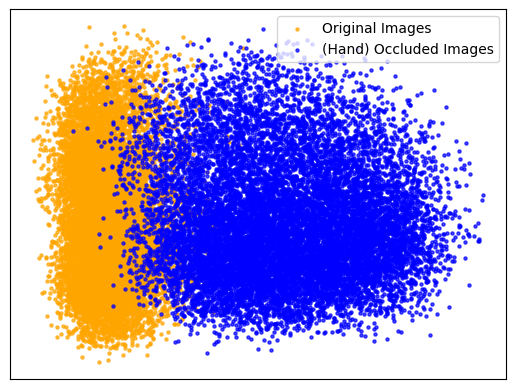

In [47]:
# PCA - pretrained model
from sklearn.decomposition import PCA

# original
# all_features = torch.concat([features_ori, features_obj, features_black_mask]).cpu().numpy()
all_features = torch.concat([features_ori, features_hand]).cpu().numpy()
print("shape of all_features:", all_features.shape)

pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)

# plt.title("Feature Distribution for Zero-shot retrieval (not finetuned on InShop)")
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='blue', s=5, alpha=0.7, label='(Hand) Occluded Images') # occluded image features
# plt.scatter(X_pca[2*num_features:,0], X_pca[2*num_features:,1], c='green', s=5, alpha=0.7, label='(Black mask) Occluded Images') # occluded image features
plt.legend()
plt.xticks([],[])
plt.yticks([],[])

plt.show()


In [ ]:
# original
# all_features = torch.concat([features_ori, features_obj]).cpu().numpy()
# print("shape of all_features:", all_features.shape)

# pca = PCA()
# X_pca = pca.fit_transform(all_features)
# num_features = len(features_ori)

# plt.title("Feature Distribution for Zero-shot retrieval (not finetuned on InShop)")
# plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, label='Original Images') # original image features
# plt.scatter(X_pca[num_features:,0], X_pca[num_features:,1], c='blue', s=5, label='(Object) Occluded Images') # occluded image features
# plt.legend()

# plt.show()

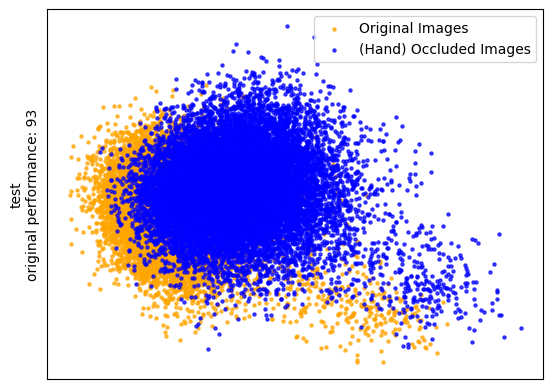

In [62]:
# PCA - finetuned model

# all_features = torch.concat([ft_features_ori, ft_features_object, ft_features_black_mask]).cpu().numpy()
# all_features = torch.concat([ft_features_ori, ft_features_hand]).cpu().numpy()
# print("shape of all_features:", all_features.shape)

# pca = PCA()
# X_pca = pca.fit_transform(all_features)
# num_features = len(features_ori)

# plt.title("Feature Distribution for Finetuned retrieval (finetuned on InShop)")
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='blue', s=5, alpha=0.7, label='(Hand) Occluded Images') # occluded image features
# plt.scatter(X_pca[2*num_features:,0], X_pca[2*num_features:,1], c='green', s=5, alpha=0.7, label='(Black mask) Occluded Images') # occluded image features
plt.legend()
plt.xticks([],[])
plt.yticks([],[])
plt.ylabel("test\noriginal performance: 93",labelpad=5.)

plt.show()

Text(0.5, 0, 'mAP=37.11')

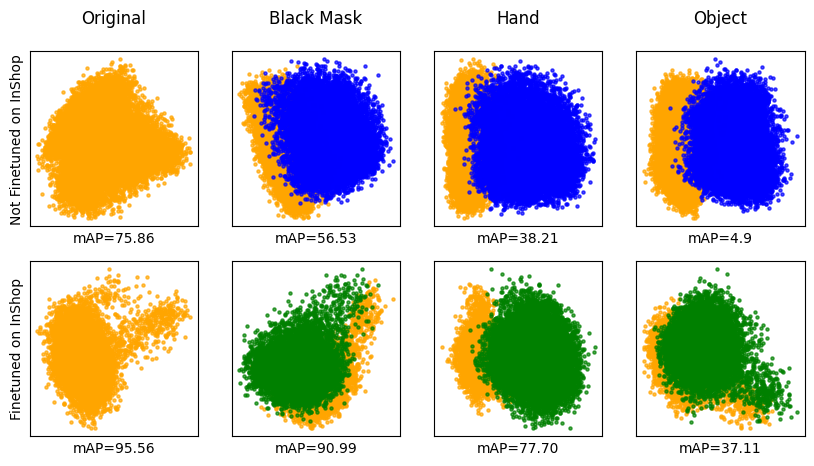

In [66]:
############

# make a big plot with subplot
plt.figure(figsize=(10,5))
# fig, axs = plt.subplots(2,4)
# fig.suptitle('Vertically stacked subplots')

# 1. zeroshot - original image
all_features = torch.concat([features_ori]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,1)
plt.title("Original", pad=20)
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
# plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='blue', s=5, alpha=0.7, label='(Black mask) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=75.86")
plt.ylabel("Not Finetuned on InShop")

# 2. zeroshot - black mask
all_features = torch.concat([features_ori, features_black_mask]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,2)
plt.title("Black Mask", pad=20)
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='blue', s=5, alpha=0.7, label='(Black mask) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=56.53")

# 3. zeroshot - hand
all_features = torch.concat([features_ori, features_hand]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,3)
plt.title("Hand", pad=20)
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='blue', s=5, alpha=0.7, label='(Hand) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=38.21")

# 4. zeroshot - obj
all_features = torch.concat([features_ori, features_obj]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,4)
plt.title("Object", pad=20)
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='blue', s=5, alpha=0.7, label='(Object) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=4.9")

###
# 5. finetuned - original image
all_features = torch.concat([ft_features_ori]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,5)
# plt.title("Original")
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
# plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='blue', s=5, alpha=0.7, label='(Black mask) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=95.56")
plt.ylabel("Finetuned on InShop")

# 6. finetuned - black mask
all_features = torch.concat([ft_features_ori, ft_features_black_mask]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,6)
# plt.title("Black Mask")
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='green', s=5, alpha=0.7, label='(Black mask) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=90.99")
# plt.ylabel("Finetuned on InShop")

# 6. finetuned - hand
all_features = torch.concat([ft_features_ori, ft_features_hand]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,7)
# plt.title("Hand")
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='green', s=5, alpha=0.7, label='(Hand) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=77.70")

# 5. finetuned - obj
all_features = torch.concat([ft_features_ori, ft_features_object]).cpu().numpy()
pca = PCA()
X_pca = pca.fit_transform(all_features)
num_features = len(features_ori)
plt.subplot(2,4,8)
# plt.title("Object")
plt.scatter(X_pca[:num_features,0], X_pca[:num_features,1], c='orange', s=5, alpha=0.7, label='Original Images') # original image features
plt.scatter(X_pca[num_features:2*num_features,0], X_pca[num_features:2*num_features,1], c='green', s=5, alpha=0.7, label='(Object) Occluded Images') # occluded image features
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel("mAP=37.11")



## Looking for Critical Part
Look for some crucial part of the image that affects model's retrieval performance a lot.

Give the model various set of occluded images, using one single image (at a time).

In [16]:
database = Inshop_Dataset('data', 'gallery', preprocess_ori)
query_set = Inshop_Dataset('data', 'query', preprocess_ori)

In [ ]:
# preprocess images with masks!


In [ ]:
# get feature vector from query image
from retrieval import evaluation, get_dataset
inshop_dataset = get_dataset("inshop", preprocess_ori)
sample_image, sample_label = inshop_dataset['query'][0]

with torch.no_grad():
    sample_feature = model(sample_image.cuda())

sample_feature = torch.nn.functional.normalize(sample_feature, dim=-1)

# get feature vectors of gallery(database) images
candidate_features = get_features(inshop_dataset['gallery'], model)
candidate_features = torch.nn.functional.normalize(candidate_features, dim=-1)


# refer to evaluation function in retrieval.py